In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import corner
import math
import csv
from numpy import *

import matplotlib
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import sklearn.metrics as metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from fpdf import FPDF
import pydotplus


%matplotlib inline
import graphviz
from sklearn import tree
from xgboost import plot_tree
from sklearn.tree import DecisionTreeClassifier

#### instability time vs. m1/m2 (most massive planet)

In [96]:
planets = pd.read_csv('10 mm.csv', skipinitialspace=True)

print(planets.columns)

Index(['run', 'planet', 'cv e', 'cv a', 'cv peri', 'cv i', 'initial e',
       'final e', 'mean e', 'min e', 'max e', 'sd e', 'initial i', 'final i',
       'mean i', 'min i', 'max i', 'sd i', 'initial pericenter',
       'final pericenter', 'mean pericenter', 'min pericenter',
       'max pericenter', 'sd pericenter', 'initial jacobi', 'final jacobi',
       'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi', 'initial mhr1',
       'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1', 'sd mhr1',
       'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2', 'max mhr2',
       'sd mhr2', 'initial log a1_ratio', 'final log a1_ratio',
       'mean log a1_ratio', 'min log a1_ratio', 'max log a1_ratio',
       'sd log a1_ratio', 'initial log a2_ratio', 'final log a2_ratio',
       'mean log a2_ratio', 'min log a2_ratio', 'max log a2_ratio',
       'sd log a2_ratio', 'initial log mass1_ratio', 'final log mass1_ratio',
       'mean log mass1_ratio', 'min log mass1_ratio', 'max log mass1_rati

Text(0, 0.5, 'log instability time')

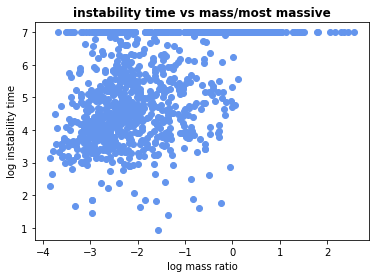

In [97]:
fig = plt.figure()
plt.title('instability time vs mass/most massive', fontweight='bold')

for i in range(len(planets['end time'])):
    plt.scatter(planets['initial log mass1_ratio'][i], np.log10(planets['end time'][i]), c='cornflowerblue')
    
# plt.xlim(0,3)    
    
plt.xlabel('log mass ratio')
plt.ylabel('log instability time')

#### revised instability time vs relative masses

In [70]:
planets = pd.read_csv('10tsMM all t.csv', skipinitialspace=True)

print(planets.columns)

Index(['run', 'planet', 'cv e', 'cv a', 'cv i', 'initial e', 'final e',
       'mean e', 'min e', 'max e',
       ...
       'log mass3_ratio', 'log mass4_ratio', 'log mass5_ratio',
       'log mass6_ratio', 'log mass7_ratio', 'log mass8_ratio',
       'log mass9_ratio', 'log mass10_ratio', 'end time', 'fate'],
      dtype='object', length=149)


Text(0, 0.5, 'log instability time')

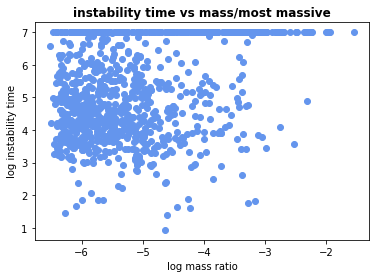

In [77]:
fig = plt.figure()
plt.title('instability time vs mass/most massive', fontweight='bold')

for i in range(len(planets['end time'])):
    plt.scatter(planets['log mass1_ratio'][i], np.log10(planets['end time'][i]), c='cornflowerblue')
    
    
    
# plt.xlim(0,3)    
    
plt.xlabel('log mass ratio')
plt.ylabel('log instability time')

#### instability time as function of planet number

Text(0, 0.5, 'log 10(instability time)')

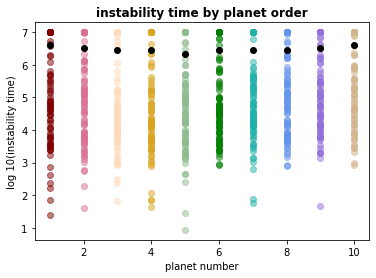

In [49]:
fig = plt.figure()
plt.title('instability time by planet order', fontweight='bold')

inst1 = []
inst2 = []
inst3 = []
inst4 = []
inst5 = []
inst6 = []
inst7 = []
inst8 = []
inst9 = []
inst10 = []


colors2 = ['maroon', 'palevioletred', 'peachpuff', 'goldenrod', 'darkseagreen', 'green', 'lightseagreen', 'cornflowerblue', 'mediumpurple', 'tan']

allinsts = [inst1, inst2, inst3, inst4, inst5, inst6, inst7, inst8, inst9, inst10]
plnumbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(len(planets['end time'])):
    if (planets['planet'][i] == 1):
        inst1.append(planets['end time'][i])
    elif (planets['planet'][i] == 2):
        inst2.append(planets['end time'][i])
    elif (planets['planet'][i] == 3):
        inst3.append(planets['end time'][i])
    elif (planets['planet'][i] == 4):
        inst4.append(planets['end time'][i])
    elif (planets['planet'][i] == 5):
        inst5.append(planets['end time'][i])
    elif (planets['planet'][i] == 6):
        inst6.append(planets['end time'][i])
    elif (planets['planet'][i] == 7):
        inst7.append(planets['end time'][i])
    elif (planets['planet'][i] == 8):
        inst8.append(planets['end time'][i])
    elif (planets['planet'][i] == 9):
        inst9.append(planets['end time'][i])
    else:
        inst10.append(planets['end time'][i])
        
    
for i in range(len(allinsts)):
    for x in range(len(allinsts[i])):
        plt.scatter(plnumbers[i], np.log10(allinsts[i][x]), alpha=0.5, color=colors2[i])
    
    
for i in range(len(allinsts)):
    plt.scatter(plnumbers[i], np.log10(np.average(allinsts[i])), color='black')
    
    
plt.xlabel('planet number')
plt.ylabel('log 10(instability time)')

Text(0, 0.5, 'frequency')

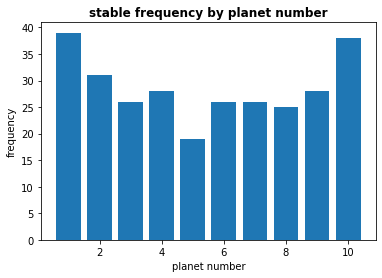

In [56]:
stablefreqs = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plnumbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


for i in range(len(planets['end time'])):
    if (planets['end time'][i] != 1.000000e+07):
        pass
    
    else:
        currentplanet = planets['planet'][i]
        stablefreqs[currentplanet-1] += 1
        
fig = plt.figure()
plt.title('stable frequency by planet number', fontweight='bold')

plt.bar(plnumbers, stablefreqs)
plt.xlabel('planet number')
plt.ylabel('frequency')

#### histogram of mass ejections

In [2]:
data = dict()

for rn in range(1,101):
    data[rn] = dict()
    
    for planetnum in range(1,11):
        data[rn][planetnum] = dict()
        pl = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=2, max_rows=1)
        
        data[rn][planetnum]['mass'] = pl[1]
        
        
for rn in range(1,101):
    for planetnum in range(1,11):
        data[rn][planetnum]['end time'] = 10000000.0

        with open('/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/info.out', 'r') as file:
            lines = file.readlines()
            for line in lines:
                if "PL" in line:
                    cols = line.split()
                    plnt = int(cols[0].split('L')[-1])
                    plnt2 = cols[4].split('L')[-1]

                    if "ejected" in line:
                        data[rn][plnt]['end time'] = float(cols[3])
                    elif "collided with the central body" in line:
                        data[rn][plnt]['end time'] = float(cols[7])
                    elif "was hit by" in line:
                        data[rn][int(plnt2)]['end time'] = float(cols[6])

In [99]:
c1 = 0
m1 = []

c2 = 0
m2 = []

c3 = 0
m3 = []

c4 = 0
m4 = []

c5 = 0
m5 = []

c6 = 0
m6 = []

c7 = 0
m7 = []

c8 = 0
m8 = []

c9 = 0
m9 = []

c10 = 0
m10 = []


for run in range(1,101):
    masses = []
    massesc = []
    ets = []
    etsc = []
    
    for p in range(1, 11):
        masses.append(data[run][p]['mass'])
        massesc.append(data[run][p]['mass'])
        ets.append(data[run][p]['end time'])
        etsc.append(data[run][p]['end time'])
    
    p1 = np.max(masses) 
    m1.append(p1)
    ind = massesc.index(p1)
    if etsc[ind] != 10000000.0:
        c1 += 1    
    ets.remove(etsc[ind])
    masses.remove(p1)
    
    p2 = np.max(masses) 
    m2.append(p2)
    ind = massesc.index(p2)
    if etsc[ind] != 10000000.0:
        c2 += 1    
    ets.remove(etsc[ind])
    masses.remove(p2)
    
    p3 = np.max(masses)
    m3.append(p3)
    ind = massesc.index(p3)
    if etsc[ind] != 10000000.0:
        c3 += 1    
    ets.remove(etsc[ind])
    masses.remove(p3)
    
    p4 = np.max(masses)  
    m4.append(p4)
    ind = massesc.index(p4)
    if etsc[ind] != 10000000.0:
        c4 += 1    
    ets.remove(etsc[ind])
    masses.remove(p4)
    
    p5 = np.max(masses) 
    m5.append(p5)
    ind = massesc.index(p5)
    if etsc[ind] != 10000000.0:
        c5 += 1    
    ets.remove(etsc[ind])
    masses.remove(p5)
    
    p6 = np.max(masses)  
    m6.append(p6)
    ind = massesc.index(p6)
    if etsc[ind] != 10000000.0:
        c6 += 1    
    ets.remove(etsc[ind])
    masses.remove(p6)
    
    p7 = np.max(masses)  
    m7.append(p7)
    ind = massesc.index(p7)
    if etsc[ind] != 10000000.0:
        c7 += 1    
    ets.remove(etsc[ind])
    masses.remove(p7)
    
    p8 = np.max(masses) 
    m8.append(p8)
    ind = massesc.index(p8)
    if etsc[ind] != 10000000.0:
        c8 += 1    
    ets.remove(etsc[ind])
    masses.remove(p8)
    
    p9 = np.max(masses)  
    m9.append(p9)
    ind = massesc.index(p9)
    if etsc[ind] != 10000000.0:
        c9 += 1    
    ets.remove(etsc[ind])
    masses.remove(p9)
    
    p10 = np.max(masses)  
    m10.append(p10)
    ind = massesc.index(p10)
    if etsc[ind] != 10000000.0:
        c10 += 1    
    ets.remove(etsc[ind])
    masses.remove(p10)

In [100]:
counts = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for c in range(len(counts)):
    print(str(c+1) + ' most massive planet goes unstable ' + str(counts[c]) + '/100 times')

1 most massive planet goes unstable 3/100 times
2 most massive planet goes unstable 34/100 times
3 most massive planet goes unstable 71/100 times
4 most massive planet goes unstable 79/100 times
5 most massive planet goes unstable 86/100 times
6 most massive planet goes unstable 87/100 times
7 most massive planet goes unstable 88/100 times
8 most massive planet goes unstable 90/100 times
9 most massive planet goes unstable 87/100 times
10 most massive planet goes unstable 89/100 times


#### mass differences

Text(0, 0.5, 'instability occurences')

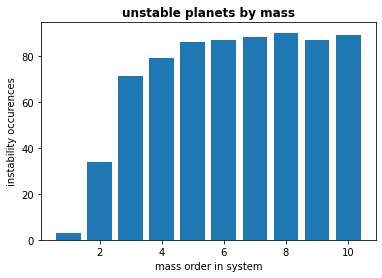

In [101]:
fig = plt.figure()
plt.title('unstable planets by mass', fontweight='bold')

plt.bar(order, counts)
plt.xlabel('mass order in system')
plt.ylabel('instability occurences')

Text(0, 0.5, 'mass')

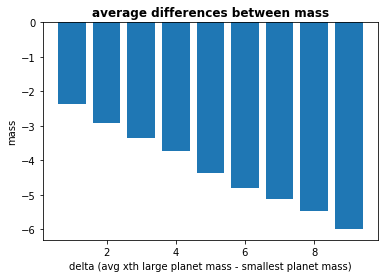

In [113]:
ad = [(np.average(m1) - np.average(m10)), (np.average(m2) - np.average(m10)), (np.average(m3) - np.average(m10)),
      (np.average(m4) - np.average(m10)), (np.average(m5) - np.average(m10)), (np.average(m6) - np.average(m10)),
      (np.average(m7) - np.average(m10)), (np.average(m8) - np.average(m10)), (np.average(m9) - np.average(m10))]

delt = [1, 2, 3, 4, 5, 6, 7, 8, 9]


fig = plt.figure()
plt.title('average differences between mass', fontweight='bold')

plt.bar(delt, np.log10(ad))
plt.xlabel('delta (avg xth large planet mass - smallest planet mass)')
plt.ylabel('mass')

In [102]:
delt1_10 = []
delt2_10 = []
delt3_10 = []
delt4_10 = []
delt5_10 = []
delt6_10 = []
delt7_10 = []
delt8_10 = []
delt9_10 = []


for run in range(1,101):
    masses = []
    
    for p in range(1, 11):
        masses.append(data[run][p]['mass'])
    
    p1 = np.max(masses) 
    m1.append(p1)
    masses.remove(p1)
    
    p2 = np.max(masses) 
    m2.append(p2)
    masses.remove(p2)
    
    p3 = np.max(masses)
    m3.append(p3)
    masses.remove(p3)
    
    p4 = np.max(masses)  
    m4.append(p4)
    masses.remove(p4)
    
    p5 = np.max(masses) 
    m5.append(p5)
    masses.remove(p5)
    
    p6 = np.max(masses)  
    m6.append(p6)
    masses.remove(p6)
    
    p7 = np.max(masses)  
    m7.append(p7)
    masses.remove(p7)
    
    p8 = np.max(masses) 
    m8.append(p8)
    masses.remove(p8)
    
    p9 = np.max(masses)  
    m9.append(p9)
    masses.remove(p9)
    
    p10 = np.max(masses)  
    m10.append(p10)
    masses.remove(p10)
    
    delt1_10.append(p1-p10)
    delt2_10.append(p2-p10)
    delt3_10.append(p3-p10)
    delt4_10.append(p4-p10)
    delt5_10.append(p5-p10)
    delt6_10.append(p6-p10)
    delt7_10.append(p7-p10)
    delt8_10.append(p8-p10)
    delt9_10.append(p9-p10)

Text(0, 0.5, 'mass')

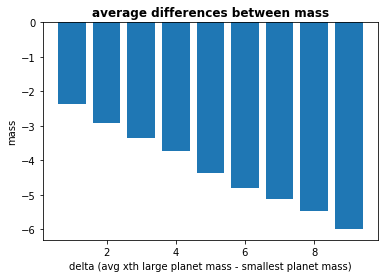

In [103]:
# calculated by finding individual differences first then averaging

ad2 = [np.average(delt1_10), np.average(delt2_10), np.average(delt3_10), np.average(delt4_10), 
       np.average(delt5_10), np.average(delt6_10), np.average(delt7_10), np.average(delt8_10), 
       np.average(delt9_10)]

delt = [1, 2, 3, 4, 5, 6, 7, 8, 9]


fig = plt.figure()
plt.title('average differences between mass', fontweight='bold')

plt.bar(delt, np.log10(ad2))
plt.xlabel('delta (avg xth large planet mass - smallest planet mass)')
plt.ylabel('mass')

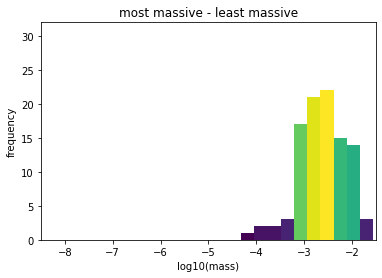

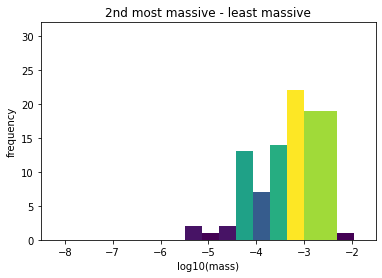

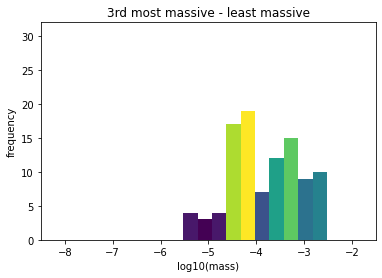

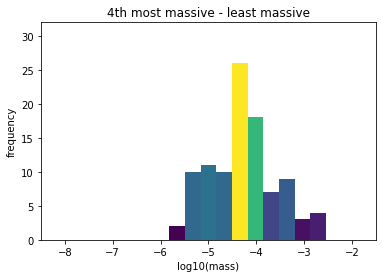

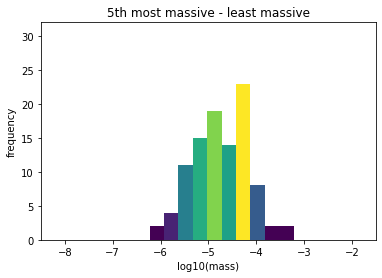

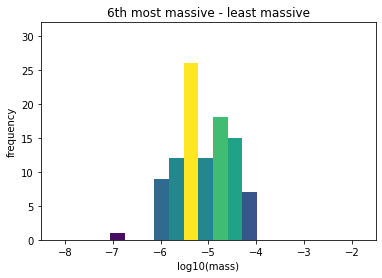

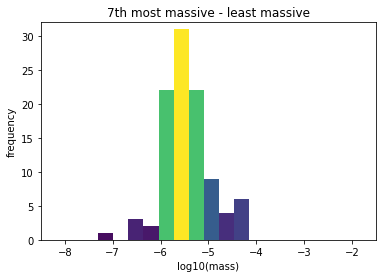

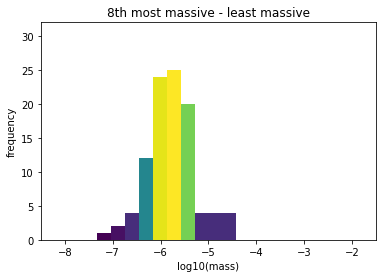

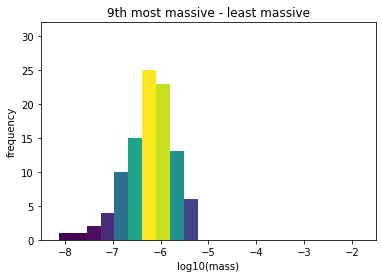

In [104]:
arrs = [delt1_10, delt2_10, delt3_10, delt4_10, delt5_10, delt6_10, delt7_10, delt8_10, delt9_10]
nts = ['most massive - least massive', '2nd most massive - least massive', '3rd most massive - least massive',
      '4th most massive - least massive', '5th most massive - least massive', '6th most massive - least massive', 
      '7th most massive - least massive', '8th most massive - least massive', '9th most massive - least massive']


for i in range(len(arrs)):
    fig = plt.figure()

    N, bins, patches = plt.hist(np.log10(arrs[i]), bins = 10)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    plt.xlabel('log10(mass)')
    plt.title(nts[i])
    plt.ylabel('frequency')
    
    plt.xlim(-8.5, -1.5)
    plt.ylim(0,32)

In [105]:
colors = ['maroon', 'palevioletred', 'peachpuff', 'goldenrod', 'darkseagreen', 'green', 'lightseagreen', 'cornflowerblue', 'mediumpurple']

In [106]:
max1_10 = []
max2_10 = []
max3_10 = []
max4_10 = []
max5_10 = []
max6_10 = []
max7_10 = []
max8_10 = []
max9_10 = []
max10s = []

for run in range(1,101):
    max1_10.append(data[run][1]['mass'])
    max2_10.append(data[run][2]['mass'])
    max3_10.append(data[run][3]['mass'])
    max4_10.append(data[run][4]['mass'])
    max5_10.append(data[run][5]['mass'])
    max6_10.append(data[run][6]['mass'])
    max7_10.append(data[run][7]['mass'])
    max8_10.append(data[run][8]['mass'])
    max9_10.append(data[run][9]['mass'])
    max10s.append(data[run][10]['mass'])

Text(0, 0.5, 'log 10(current mass-least massive)')

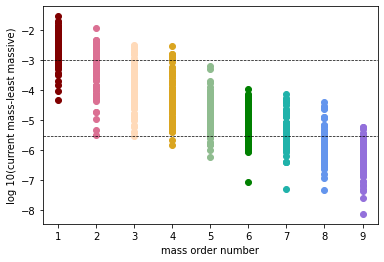

In [107]:
arrs = [delt1_10, delt2_10, delt3_10, delt4_10, delt5_10, delt6_10, delt7_10, delt8_10, delt9_10]
arrs2 = [max1_10, max2_10, max3_10, max4_10, max5_10, max6_10, max7_10, max8_10, max9_10]


fig = plt.figure()

for i in range(len(arrs)):
    for x in range(len(arrs[i])):
        plt.scatter(i+1, np.log10(arrs[i][x]), c=colors[i])


plt.axhline(y=np.log10(3e-6), linestyle='dashed', color='black', linewidth=0.7)
plt.axhline(y=np.log10(1e-3), linestyle='dashed', color='black', linewidth=0.7)  

        
plt.xlabel('mass order number')
plt.ylabel('log 10(current mass-least massive)')

In [108]:
sysms = []

for r in range(1,101):
    curr = []
    for p in range(1,11):
        curr.append(data[r][p]['mass'])
    sysms.append(np.max(curr))

(-8.5, -1.0)

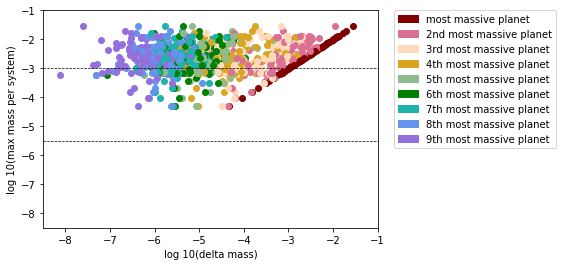

In [109]:
arrs = [delt1_10, delt2_10, delt3_10, delt4_10, delt5_10, delt6_10, delt7_10, delt8_10, delt9_10]

fig = plt.figure()

for i in range(0,100):
    for j in range(len(arrs)):
        plt.scatter(np.log10(arrs[j][i]), np.log10(sysms[i]), color = colors[j])
        count += 1

        
plt.axhline(y=np.log10(3e-6), linestyle='dashed', color='black', linewidth=0.7)
plt.axhline(y=np.log10(1e-3), linestyle='dashed', color='black', linewidth=0.7)  

        
plt.xlabel('log 10(delta mass)')
plt.ylabel('log 10(max mass per system)')   

patch1 = mpatches.Patch(color='maroon', label='most massive planet')
patch2 = mpatches.Patch(color='palevioletred', label='2nd most massive planet')
patch3 = mpatches.Patch(color='peachpuff', label='3rd most massive planet')
patch4 = mpatches.Patch(color='goldenrod', label='4th most massive planet')
patch5 = mpatches.Patch(color='darkseagreen', label='5th most massive planet')
patch6 = mpatches.Patch(color='green', label='6th most massive planet')
patch7 = mpatches.Patch(color='lightseagreen', label='7th most massive planet')
patch8 = mpatches.Patch(color='cornflowerblue', label='8th most massive planet')
patch9 = mpatches.Patch(color='mediumpurple', label='9th most massive planet')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.xlim(-8.5, -1)
plt.ylim(-8.5, -1)

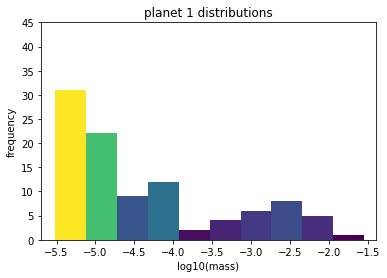

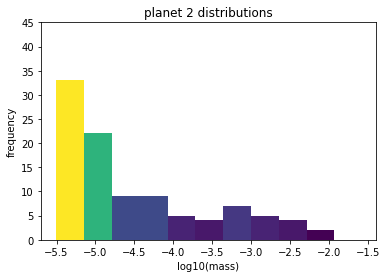

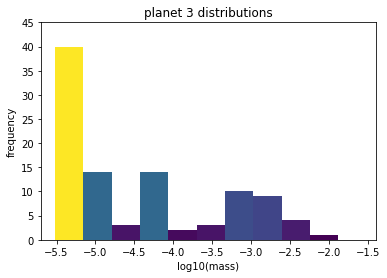

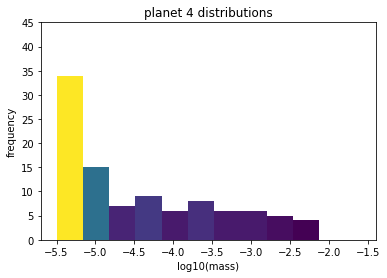

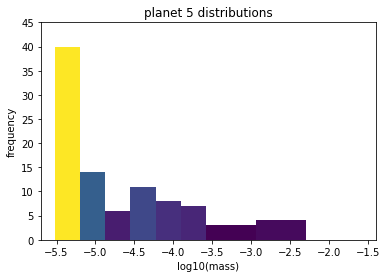

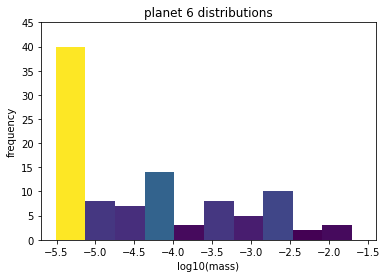

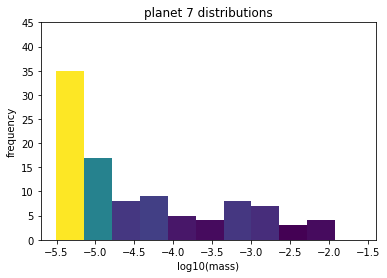

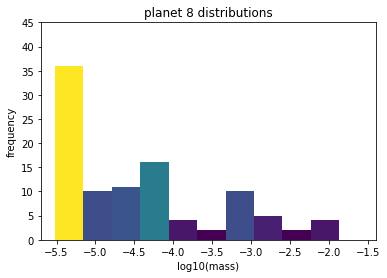

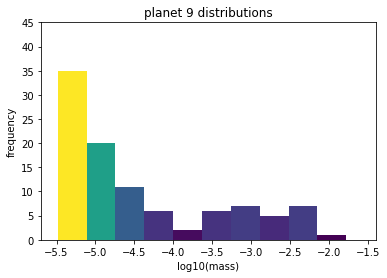

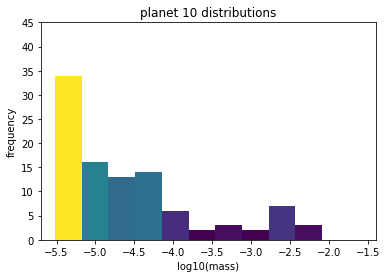

In [92]:
arrs2 = [max1_10, max2_10, max3_10, max4_10, max5_10, max6_10, max7_10, max8_10, max9_10, max10s]
nts = ['planet 1 distributions', 'planet 2 distributions', 'planet 3 distributions', 'planet 4 distributions', 
       'planet 5 distributions', 'planet 6 distributions', 'planet 7 distributions', 'planet 8 distributions',
       'planet 9 distributions', 'planet 10 distributions']


for i in range(len(arrs2)):
    fig = plt.figure()

    N, bins, patches = plt.hist(np.log10(arrs2[i]), bins = 10)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    plt.xlabel('log10(mass)')
    plt.title(nts[i])
    plt.ylabel('frequency')
    
    plt.xlim(-5.7, -1.4)
    plt.ylim(0,45)

#### most massive planet distribution

In [110]:
firstmm = 0
secondmm = 0
thirdmm = 0
fourthmm = 0
fifthmm = 0
sixthmm = 0
seventhmm = 0
eighthmm = 0
ninthmm = 0
tenthmm = 0

mmplandist = [firstmm, secondmm, thirdmm, fourthmm, fifthmm, sixthmm, seventhmm, eighthmm, ninthmm, tenthmm]

for r in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[r][p]['mass'])
        
    mm1 = np.max(ms) 
    ind = ms.index(mm1)
    
    mmplandist[ind] += 1

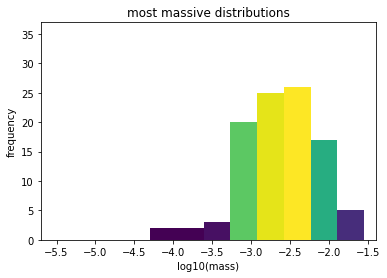

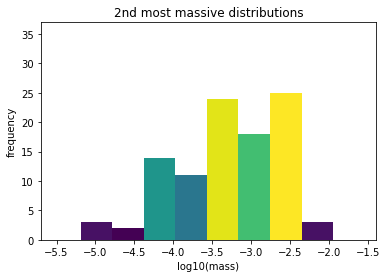

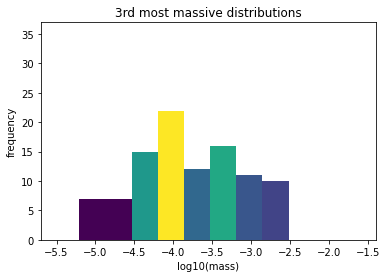

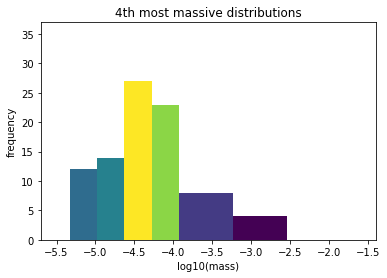

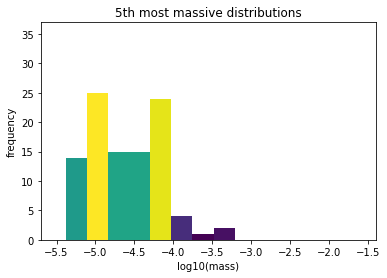

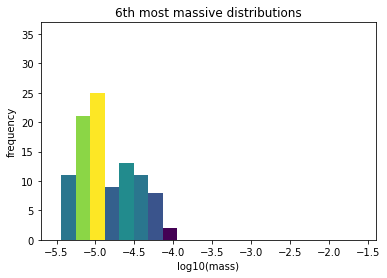

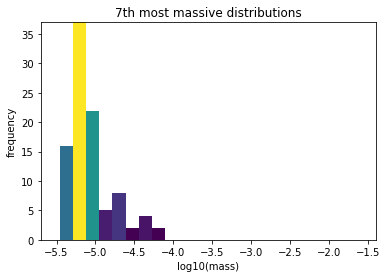

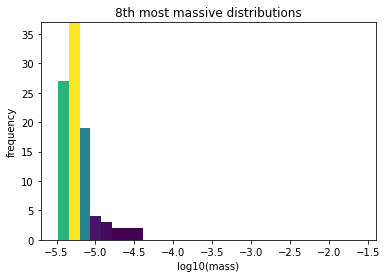

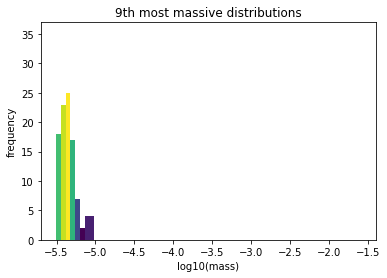

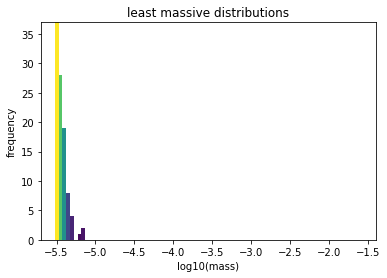

In [7]:
firstmm = []
secondmm = []
thirdmm = []
fourthmm = []
fifthmm = []
sixthmm = []
seventhmm = []
eighthmm = []
ninthmm = []
tenthmm = []


for run in range(1,101):
    masses = []
    
    for p in range(1, 11):
        masses.append(data[run][p]['mass'])
    
    p1 = np.max(masses) 
    firstmm.append(p1)
    masses.remove(p1)
    
    p2 = np.max(masses) 
    secondmm.append(p2)
    masses.remove(p2)
    
    p3 = np.max(masses)
    thirdmm.append(p3)
    masses.remove(p3)
    
    p4 = np.max(masses)  
    fourthmm.append(p4)
    masses.remove(p4)
    
    p5 = np.max(masses) 
    fifthmm.append(p5)
    masses.remove(p5)
    
    p6 = np.max(masses)  
    sixthmm.append(p6)
    masses.remove(p6)
    
    p7 = np.max(masses)  
    seventhmm.append(p7)
    masses.remove(p7)
    
    p8 = np.max(masses) 
    eighthmm.append(p8)
    masses.remove(p8)
    
    p9 = np.max(masses)  
    ninthmm.append(p9)
    masses.remove(p9)
    
    p10 = np.max(masses)  
    tenthmm.append(p10)
    masses.remove(p10)
    
    
    
arrs2 = [firstmm, secondmm, thirdmm, fourthmm, fifthmm, sixthmm, seventhmm, eighthmm, ninthmm, tenthmm]
nts = ['most massive distributions', '2nd most massive distributions', '3rd most massive distributions', 
       '4th most massive distributions', '5th most massive distributions', '6th most massive distributions',
       '7th most massive distributions', '8th most massive distributions', '9th most massive distributions', 
       'least massive distributions']


for i in range(len(arrs2)):
    fig = plt.figure()

    N, bins, patches = plt.hist(np.log10(arrs2[i]), bins = 8)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    plt.xlabel('log10(mass)')
    plt.title(nts[i])
    plt.ylabel('frequency')
    
    plt.xlim(-5.7, -1.4)
    plt.ylim(0,37)

Text(0, 0.5, 'frequency')

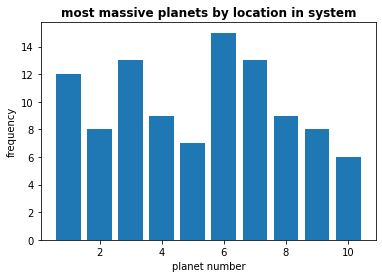

In [113]:
plans = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig = plt.figure()
plt.title('most massive planets by location in system', fontweight='bold')

plt.bar(plans, mmplandist)
plt.xlabel('planet number')
plt.ylabel('frequency')

In [ ]:
# firstmma = []
secondmma = []
thirdmma = []
fourthmma = []
fifthmma = []
sixthmma = []
seventhmma = []
eighthmma = []
ninthmma = []
tenthmma = []


for r in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[r][p]['mass'])

#### more mass things

In [114]:
data = dict()

for rn in range(1,101):
    data[rn] = dict()
    
    for planetnum in range(1,11):
        data[rn][planetnum] = dict()
        pl = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=2, max_rows=1)
        
        data[rn][planetnum]['mass'] = pl[1]

(-5.5, -1.0)

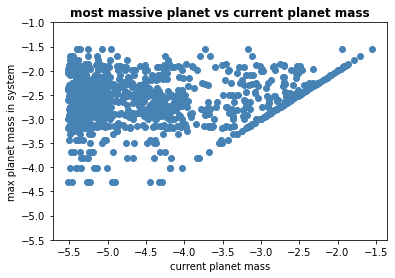

In [115]:
fig = plt.figure()
plt.title('most massive planet vs current planet mass', fontweight='bold')


for r in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[r][p]['mass'])
    m1 = np.max(ms) 
    
    for p in range(1,11):
        plt.scatter(np.log10(data[r][p]['mass']), np.log10(m1), color = 'steelblue')
        

plt.xlabel('current planet mass')
plt.ylabel('max planet mass in system')
plt.ylim(-5.5, -1)

(-5.5, -1.0)

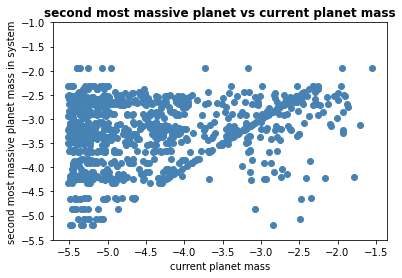

In [116]:
fig = plt.figure()
plt.title('second most massive planet vs current planet mass', fontweight='bold')


for r in range(1,101):
    ms = []
    
    for p in range(1,11):
        ms.append(data[r][p]['mass'])
    
    m1 = np.max(ms) 
    ms.remove(m1)
    m2 = np.max(ms)
    
    for p in range(1,11):
        plt.scatter(np.log10(data[r][p]['mass']), np.log10(m2), color = 'steelblue')
        

plt.xlabel('current planet mass')
plt.ylabel('second most massive planet mass in system')

plt.ylim(-5.5, -1)

#### mass ratios vs semi major axis ratios

In [2]:
data = dict()

for rn in range(1,101):
    data[rn] = dict()
    
    for planetnum in range(1,11):
        data[rn][planetnum] = dict()
        pl = genfromtxt(r'/Users/neha/Documents/lanl/classifier/s. mordasini data/run'+str(rn)+'/PL'+str(planetnum)+'.el',skip_header=2, max_rows=1)
        
        data[rn][planetnum]['mass'] = pl[1]
        data[rn][planetnum]['a'] = pl[2]

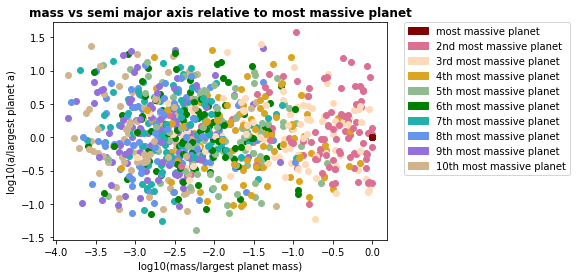

In [84]:
fig = plt.figure()
plt.title('mass vs semi major axis relative to most massive planet', fontweight='bold')

c = 0

for run in range(1,101):
    masses = []
    massesc = []
    semis = []
    
    for pl in range(1, 11):
        masses.append(data[run][pl]['mass'])
        massesc.append(data[run][pl]['mass'])
        semis.append(data[run][pl]['a'])
    
    p1 = np.max(masses) 
    ind1 = massesc.index(p1)
    a1 = semis[ind1]
        
    masses.remove(p1)
    
    p2 = np.max(masses) 
    ind2 = massesc.index(p2)
    masses.remove(p2)
    
    p3 = np.max(masses)
    ind3 = massesc.index(p3)
    masses.remove(p3)
    
    p4 = np.max(masses)
    ind4 = massesc.index(p4)
    masses.remove(p4)
    
    p5 = np.max(masses) 
    ind5 = massesc.index(p5)
    masses.remove(p5)
    
    p6 = np.max(masses)  
    ind6 = massesc.index(p6)
    masses.remove(p6)
    
    p7 = np.max(masses)  
    ind7 = massesc.index(p7)
    masses.remove(p7)
    
    p8 = np.max(masses) 
    ind8 = massesc.index(p8)
    masses.remove(p8)
    
    p9 = np.max(masses) 
    ind9 = massesc.index(p9)
    masses.remove(p9)
    
    p10 = np.max(masses) 
    ind10 = massesc.index(p10)
    masses.remove(p10)
    
    
    col = 'white'
    
    for pl2 in range(1,11):
        if (pl2 == ind1 + 1):
            col = 'maroon'
        elif (pl2 == ind2 + 1):
            col = 'palevioletred'
        elif (pl2 == ind3 + 1):
            col = 'peachpuff'
        elif (pl2 == ind4 + 1):
            col = 'goldenrod'
        elif (pl2 == ind5 + 1):
            col = 'darkseagreen'
        elif (pl2 == ind6 + 1):
            col = 'green'
        elif (pl2 == ind7 + 1):
            col = 'lightseagreen'
        elif (pl2 == ind8 + 1):
            col = 'cornflowerblue'
        elif (pl2 == ind9 + 1):
            col = 'mediumpurple'
        elif (pl2 == ind10 + 1):
            col = 'tan'
            
            
        plt.scatter(np.log10((data[run][pl2]['mass']/p1)), np.log10((data[run][pl2]['a']/a1)), color=col)
        c += 1
    

plt.xlabel('log10(mass/largest planet mass)')
plt.ylabel('log10(a/largest planet a)')

patch1 = mpatches.Patch(color='maroon', label='most massive planet')
patch2 = mpatches.Patch(color='palevioletred', label='2nd most massive planet')
patch3 = mpatches.Patch(color='peachpuff', label='3rd most massive planet')
patch4 = mpatches.Patch(color='goldenrod', label='4th most massive planet')
patch5 = mpatches.Patch(color='darkseagreen', label='5th most massive planet')
patch6 = mpatches.Patch(color='green', label='6th most massive planet')
patch7 = mpatches.Patch(color='lightseagreen', label='7th most massive planet')
patch8 = mpatches.Patch(color='cornflowerblue', label='8th most massive planet')
patch9 = mpatches.Patch(color='mediumpurple', label='9th most massive planet')
patch10 = mpatches.Patch(color='tan', label='10th most massive planet')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#### distance between planets distributions

<ipython-input-6-68e703a92a57>:32: RuntimeWarning: invalid value encountered in log10
  N, bins, patches = plt.hist(np.log10(arrs2[i]), bins = 8)


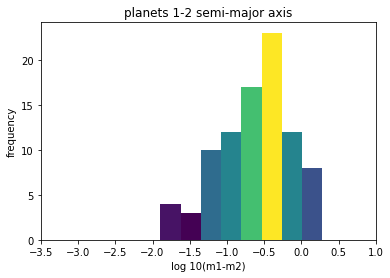

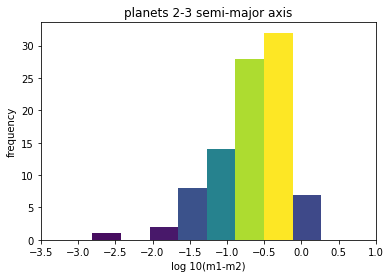

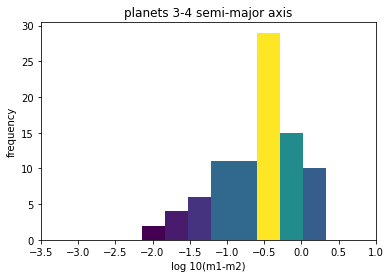

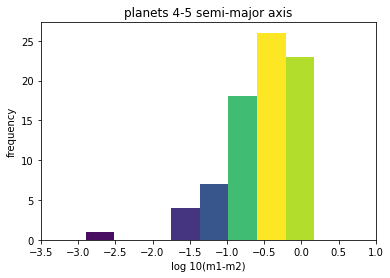

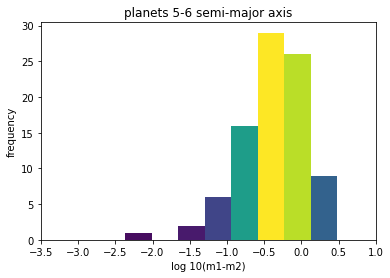

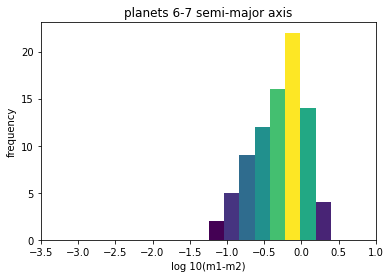

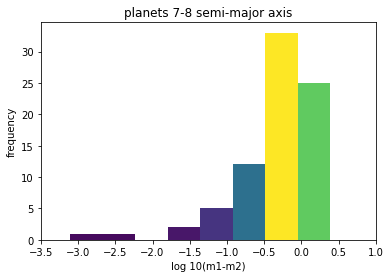

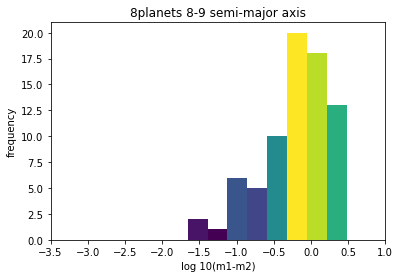

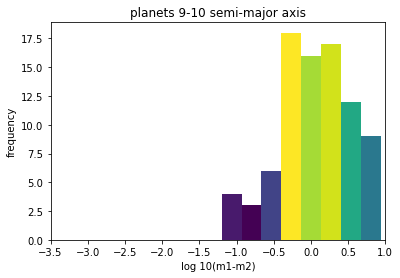

In [6]:
a1_2 = []
a2_3 = []
a3_4 = []
a4_5 = []
a5_6 = []
a6_7 = []
a7_8 = []
a8_9 = []
a9_10 = []

for r in range(1,101):
    a1_2.append(data[r][2]['a'] - data[r][1]['a'])
    a2_3.append(data[r][3]['a'] - data[r][2]['a'])
    a3_4.append(data[r][4]['a'] - data[r][3]['a'])
    a4_5.append(data[r][5]['a'] - data[r][4]['a'])
    a5_6.append(data[r][6]['a'] - data[r][5]['a'])
    a6_7.append(data[r][7]['a'] - data[r][6]['a'])
    a7_8.append(data[r][8]['a'] - data[r][7]['a'])
    a8_9.append(data[r][9]['a'] - data[r][8]['a'])
    a9_10.append(data[r][10]['a'] - data[r][9]['a'])
    

arrs2 = [a1_2, a2_3, a3_4, a4_5, a5_6, a6_7, a7_8, a8_9, a9_10]
nts = ['planets 1-2 semi-major axis', 'planets 2-3 semi-major axis', 'planets 3-4 semi-major axis', 
       'planets 4-5 semi-major axis', 'planets 5-6 semi-major axis', 'planets 6-7 semi-major axis',
       'planets 7-8 semi-major axis', '8planets 8-9 semi-major axis', 'planets 9-10 semi-major axis']


for i in range(len(arrs2)):
    fig = plt.figure()

    N, bins, patches = plt.hist(np.log10(arrs2[i]), bins = 8)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    plt.xlabel('log 10(m1-m2)')
    plt.title(nts[i])
    plt.ylabel('frequency')
    
    plt.xlim(-3.5, 1)

In [15]:
print('m1 - m2')

for i in range(len(arrs2)):
    print('median:', np.median(arrs2[i]) ,', mean:', np.mean(arrs2[i]))

m1 - m2
median: 0.25177937397749994 , mean: 0.34453101616854
median: 0.22578544729850003 , mean: 0.31199162053464
median: 0.30488853332249993 , mean: 0.3706794002277799
median: 0.2425949167949999 , mean: 0.29433040344134
median: 0.37351743512599994 , mean: 0.5047601852514799
median: 0.49336721419499985 , mean: 0.5314496386734
median: 0.4465419743900003 , mean: 0.513137723346
median: 0.5214173701299998 , mean: 0.5936029675864
median: 0.912224953 , mean: 1.5247114912128998
